# Import Liabiraries & Upload Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df=pd.read_csv('modified_file.csv')

# Display frist 5 ROWS of DATAFRAME

In [ ]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3.0
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4.0
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7.0
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7.0


# Display Information about data

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             4734 non-null   int64  
 1   Order ID           4734 non-null   object 
 2   Order Date         4734 non-null   object 
 3   Ship Date          4734 non-null   object 
 4   Ship Mode          4734 non-null   object 
 5   Customer ID        4734 non-null   object 
 6   Customer Name      4734 non-null   object 
 7   Segment            4734 non-null   object 
 8   Country            4734 non-null   object 
 9   City               4734 non-null   object 
 10  State              4734 non-null   object 
 11  Postal Code        4734 non-null   float64
 12  Region             4734 non-null   object 
 13  Product ID         4734 non-null   object 
 14  Category           4734 non-null   object 
 15  Sub-Category       4734 non-null   object 
 16  Product Name       4734 

# Edit Date Type

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Display NULLS

In [ ]:
print(df.isnull().sum())

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Shipping Duration    0
dtype: int64


## **TOP 10 PRODUCTS**

In [ ]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products:\n", top_products)

Top Selling Products:
 Product Name
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
Canon imageCLASS 2200 Advanced Copier                                          21699.938
Lexmark MX611dhe Monochrome Laser Printer                                      16829.901
Martin Yale Chadless Opener Electric Letter Opener                             12492.150
Ibico EPK-21 Electric Binding System                                            9449.950
Bady BDG101FRU Card Printer                                                     9279.884
3D Systems Cube Printer, 2nd Generation, Magenta                                9099.930
High Speed Automatic Electric Letter Opener                                     8187.650
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     8134.336
Cubify CubeX 3D Printer Triple Head Print                                       7999.980
Name: Sales, dtype: float64


**TOP SALES CATEGORIES**

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Category:\n", category_sales)


Sales by Category:
 Category
Technology         416447.5430
Furniture          339380.8557
Office Supplies    338142.1860
Name: Sales, dtype: float64


## display the count of each unique category in the "Segment"

In [ ]:
print(df["Segment"].value_counts())

Segment
Consumer       2509
Corporate      1342
Home Office     883
Name: count, dtype: int64


# Monthly Sales Trends#

In [ ]:
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()
print("\nMonthly Sales Trends:\n", monthly_sales)


Monthly Sales Trends:
 Month
1      34774.7880
2      19644.0630
3      96096.1038
4      78039.2721
5      69521.6208
6      69902.0641
7      85565.0510
8      79423.7983
9     153002.1897
10     88615.4275
11    168167.0259
12    151219.1805
Name: Sales, dtype: float64



# **Sales by Shipping Mode**

In [ ]:
shipping_sales = df.groupby('Ship Mode')['Sales'].sum()
print("\nSales by Shipping Mode:\n", shipping_sales)



Sales by Shipping Mode:
 Ship Mode
First Class       182944.3358
Same Day           69170.8100
Second Class      221209.4394
Standard Class    620645.9995
Name: Sales, dtype: float64


# Top States by Sales

In [ ]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop States by Sales:\n", top_states)


Top States by Sales:
 State
California        213962.8005
New York          142875.8640
Texas              83138.5312
Florida            57381.1850
Washington         55274.0220
Pennsylvania       52650.3930
Illinois           39111.4630
Ohio               35920.4380
Michigan           33967.3660
North Carolina     30663.4900
Name: Sales, dtype: float64


### Top Cities by Sales

In [ ]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop Cities by Sales:\n", top_cities)


Top Cities by Sales:
 City
New York City    117231.5420
Los Angeles       82842.4645
San Francisco     64253.6960
Philadelphia      49758.5670
Seattle           45683.0240
Jacksonville      31852.8510
Houston           26915.5664
Chicago           25099.2670
Newark            22528.5240
Columbus          20900.3990
Name: Sales, dtype: float64


# Least States by Sales

In [ ]:
least_states = df.groupby('State')['Sales'].sum().sort_values().head(10)
print("\nLeast States by Sales:\n", least_states)



Least States by Sales:
 State
Vermont           205.030
Maine             547.330
Nebraska          663.110
Kansas            782.970
North Dakota      891.530
South Dakota     1137.420
Idaho            1321.824
New Hampshire    1687.040
Iowa             2697.700
New Mexico       2824.794
Name: Sales, dtype: float64


# Least Cities by Sales

In [ ]:
least_cities = df.groupby('City')['Sales'].sum().sort_values().head(10)
print("\nLeast Cities by Sales:\n", least_cities)


Least Cities by Sales:
 City
Edinburg         2.368
Ormond Beach     2.808
Boca Raton       4.608
Layton           4.960
Keller           6.000
Missouri City    6.370
Haltom City      6.608
Deer Park        6.924
Morristown       7.560
Port Orange      7.824
Name: Sales, dtype: float64


# Sales by Customer Segment

In [ ]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Customer Segment:\n", segment_sales)


Sales by Customer Segment:
 Segment
Consumer       552043.0919
Corporate      311991.9413
Home Office    229935.5515
Name: Sales, dtype: float64


# Top Selling Products by Customer Segment

In [ ]:
segment_top_products = df.groupby(['Segment', 'Product Name'])['Sales'].sum().sort_values(ascending=False).groupby('Segment').head(5)
print("\nTop Selling Products by Customer Segment:\n", segment_top_products)


Top Selling Products by Customer Segment:
 Segment      Product Name                                                         
Home Office  Cisco TelePresence System EX90 Videoconferencing Unit                    22638.480
             Canon imageCLASS 2200 Advanced Copier                                    11199.968
Consumer     Canon imageCLASS 2200 Advanced Copier                                    10499.970
             Ibico EPK-21 Electric Binding System                                      9449.950
Corporate    3D Systems Cube Printer, 2nd Generation, Magenta                          9099.930
Consumer     Martin Yale Chadless Opener Electric Letter Opener                        8328.100
             High Speed Automatic Electric Letter Opener                               8187.650
             Lexmark MX611dhe Monochrome Laser Printer                                 8159.952
Corporate    Cubify CubeX 3D Printer Triple Head Print                                 7999.980
         

# **Identify Delays by State & City**

In [ ]:
expected_days = {'Standard Class': 3, 'First Class': 2, 'Second Class': 3}
df['Expected Duration'] = df['Ship Mode'].map(expected_days)
df['Delay'] = df['Shipping Duration'] > df['Expected Duration']
delay_by_location = df[df['Delay']].groupby(['State', 'City']).size().reset_index(name='Delay Count')
print("\nTop 10 Locations with Most Delays:")
print(delay_by_location.sort_values(by='Delay Count', ascending=False).head(10))


Top 10 Locations with Most Delays:
            State           City  Delay Count
260      New York  New York City          327
40     California    Los Angeles          260
319  Pennsylvania   Philadelphia          219
59     California  San Francisco          176
405    Washington        Seattle          141
358         Texas        Houston          117
127      Illinois        Chicago          106
58     California      San Diego           67
349         Texas         Dallas           57
188      Michigan        Detroit           40


# **Average Shipping Duration per Ship Mode** **texte en gras**

In [ ]:
avg_ship_duration = df.groupby('Ship Mode')['Shipping Duration'].mean().reset_index()
print("\nAverage Shipping Duration per Ship Mode:")
print(avg_ship_duration)


Average Shipping Duration per Ship Mode:
        Ship Mode  Shipping Duration
0     First Class           2.147606
1        Same Day           0.051383
2    Second Class           3.261424
3  Standard Class           5.016499


# **Summary of Findings**

In [ ]:
print("\nKey Insights:")
print(f"1. Average Shipping Duration per Ship Mode:\n{avg_ship_duration}\n")
print(f"2. Top 10 Locations with Most Delays:\n{delay_by_location.sort_values(by='Delay Count', ascending=False).head(10)}\n")



Key Insights:
1. Average Shipping Duration per Ship Mode:
        Ship Mode  Shipping Duration
0     First Class           2.147606
1        Same Day           0.051383
2    Second Class           3.261424
3  Standard Class           5.016499

2. Top 10 Locations with Most Delays:
            State           City  Delay Count
260      New York  New York City          327
40     California    Los Angeles          260
319  Pennsylvania   Philadelphia          219
59     California  San Francisco          176
405    Washington        Seattle          141
358         Texas        Houston          117
127      Illinois        Chicago          106
58     California      San Diego           67
349         Texas         Dallas           57
188      Michigan        Detroit           40



# Top States by Sales & Lowest States by Sales

In [ ]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print("\nTop States by Sales:\n", state_sales.head(10))
print("\nLowest States by Sales:\n", state_sales.tail(10))



Top States by Sales:
 State
California      49998.7005
New York        27325.4540
Texas           20307.7554
Pennsylvania    13396.9550
Washington      12188.4420
Ohio            11743.7790
Illinois         9756.9110
Florida          8221.9935
Arizona          7608.6320
Michigan         7530.3650
Name: Sales, dtype: float64

Lowest States by Sales:
 State
Arkansas                683.230
Nebraska                663.110
South Dakota            331.130
Idaho                   320.628
New Hampshire           320.540
District of Columbia    217.570
Vermont                 205.030
North Dakota            186.770
Montana                 115.358
Maine                   109.480
Name: Sales, dtype: float64


# Top Cities by Sales & Lowest Cities by Sales

In [ ]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("\nTop Cities by Sales:\n", city_sales.head(10))
print("\nLowest Cities by Sales:\n", city_sales.tail(10))



Top Cities by Sales:
 City
New York City    22143.484
Los Angeles      17744.734
San Francisco    13751.482
Philadelphia     12067.461
Seattle          10370.360
Houston           7172.362
Chicago           5697.942
Columbus          5139.107
San Diego         4462.570
Detroit           3789.904
Name: Sales, dtype: float64

Lowest Cities by Sales:
 City
Haltom City      6.608
Missouri City    6.370
Torrance         6.096
Keller           6.000
Layton           4.960
Boca Raton       4.608
Boise            3.304
Ormond Beach     2.808
Edinburg         2.368
Brownsville      1.744
Name: Sales, dtype: float64


# Sales by Region

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum()
print("\nSales by Region:\n", region_sales)


Sales by Region:
 Region
Central    52587.2614
East       68733.0820
South      35804.6515
West       81723.7265
Name: Sales, dtype: float64


# Top 10 States by Sales

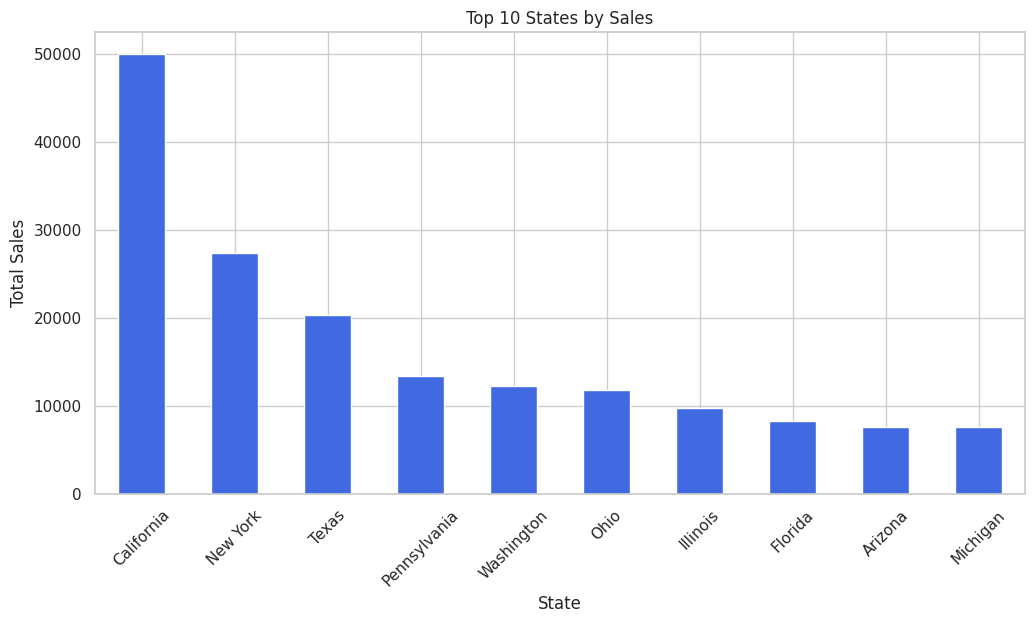

In [ ]:
# ✅ 4. رسم بياني للمبيعات حسب الولايات
plt.figure(figsize=(12, 6))
state_sales.head(10).plot(kind='bar', color='royalblue')
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Top 10 Selling Products

<ipython-input-25-d1f23bd438fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="Blues_r")


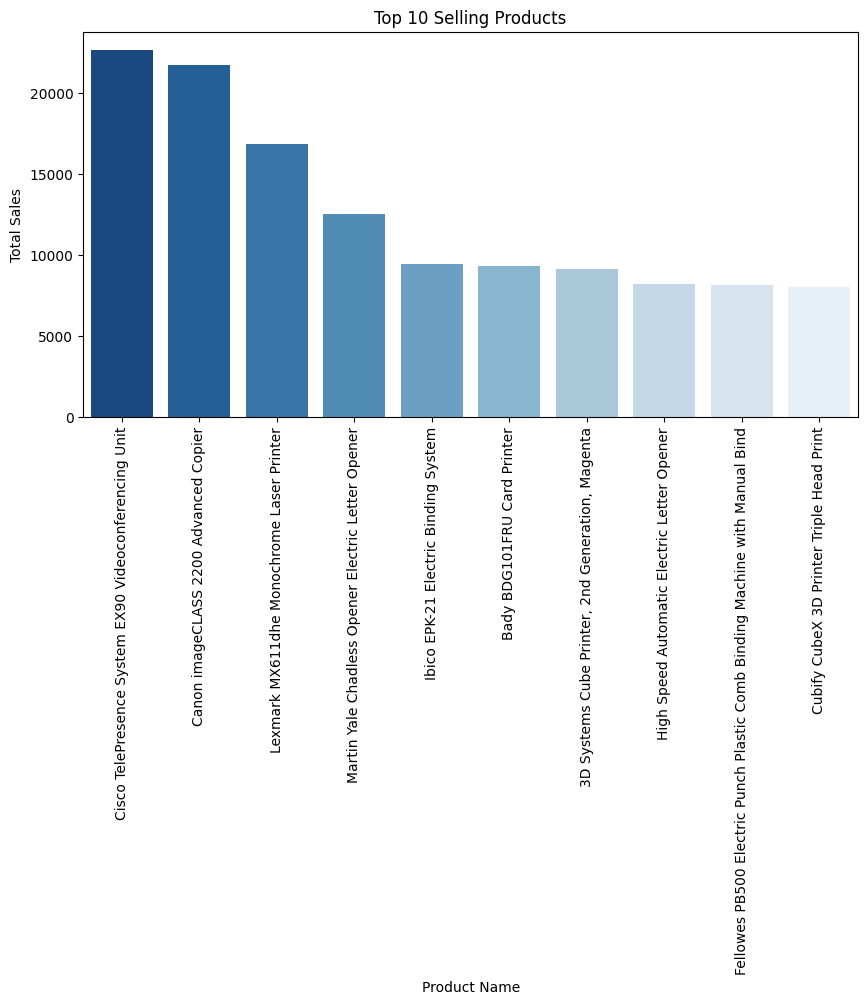

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 10 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

# **Monthly Sales Trends**

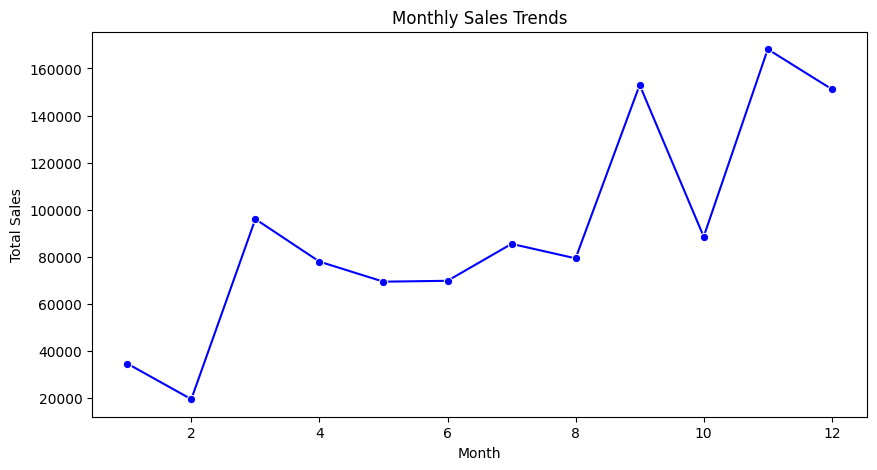

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="b")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

#visualize the distribution of customer segments in the dataset using a pie#
# chart. %%

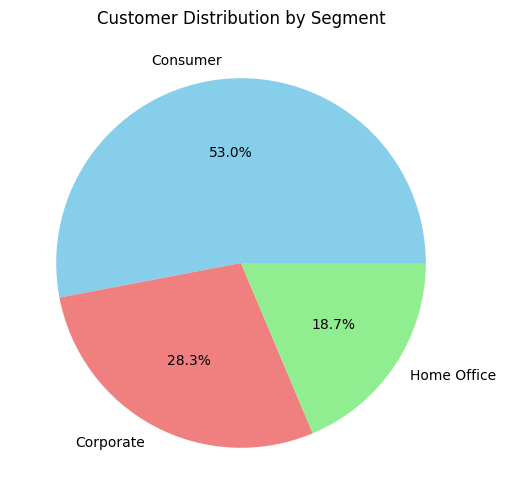

In [ ]:
plt.figure(figsize=(6, 6))
df["Segment"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightcoral", "lightgreen"])
plt.title ("Customer Distribution by Segment")
plt.ylabel("")
plt.show()

# analyzes how frequently customers place orders and visualizes the distribution
# using a histogram. %%

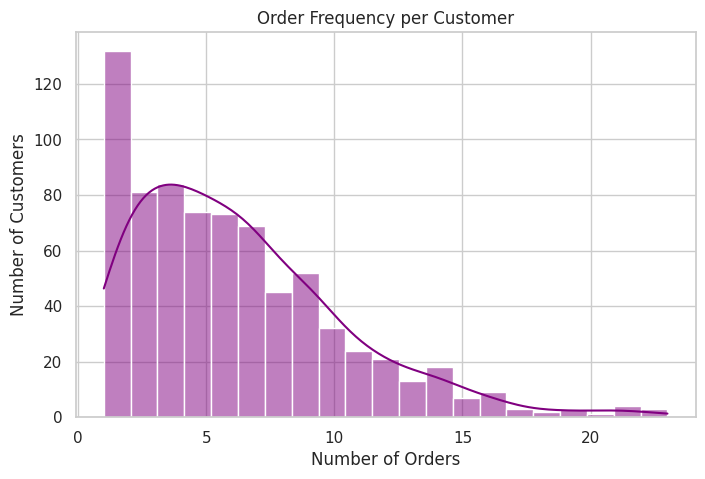

In [ ]:
repeat_customers = df.groupby("Customer ID")["Order ID"].count().reset_index()
repeat_customers.columns = ["Customer ID", "Order Count"]

plt.figure(figsize=(8, 5))
sns.histplot(repeat_customers["Order Count"], bins=21, kde=True, color="purple")
plt.title("Order Frequency per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()

# calculates the average spending per customer and visualizes its distribution
# using a boxplot. %%

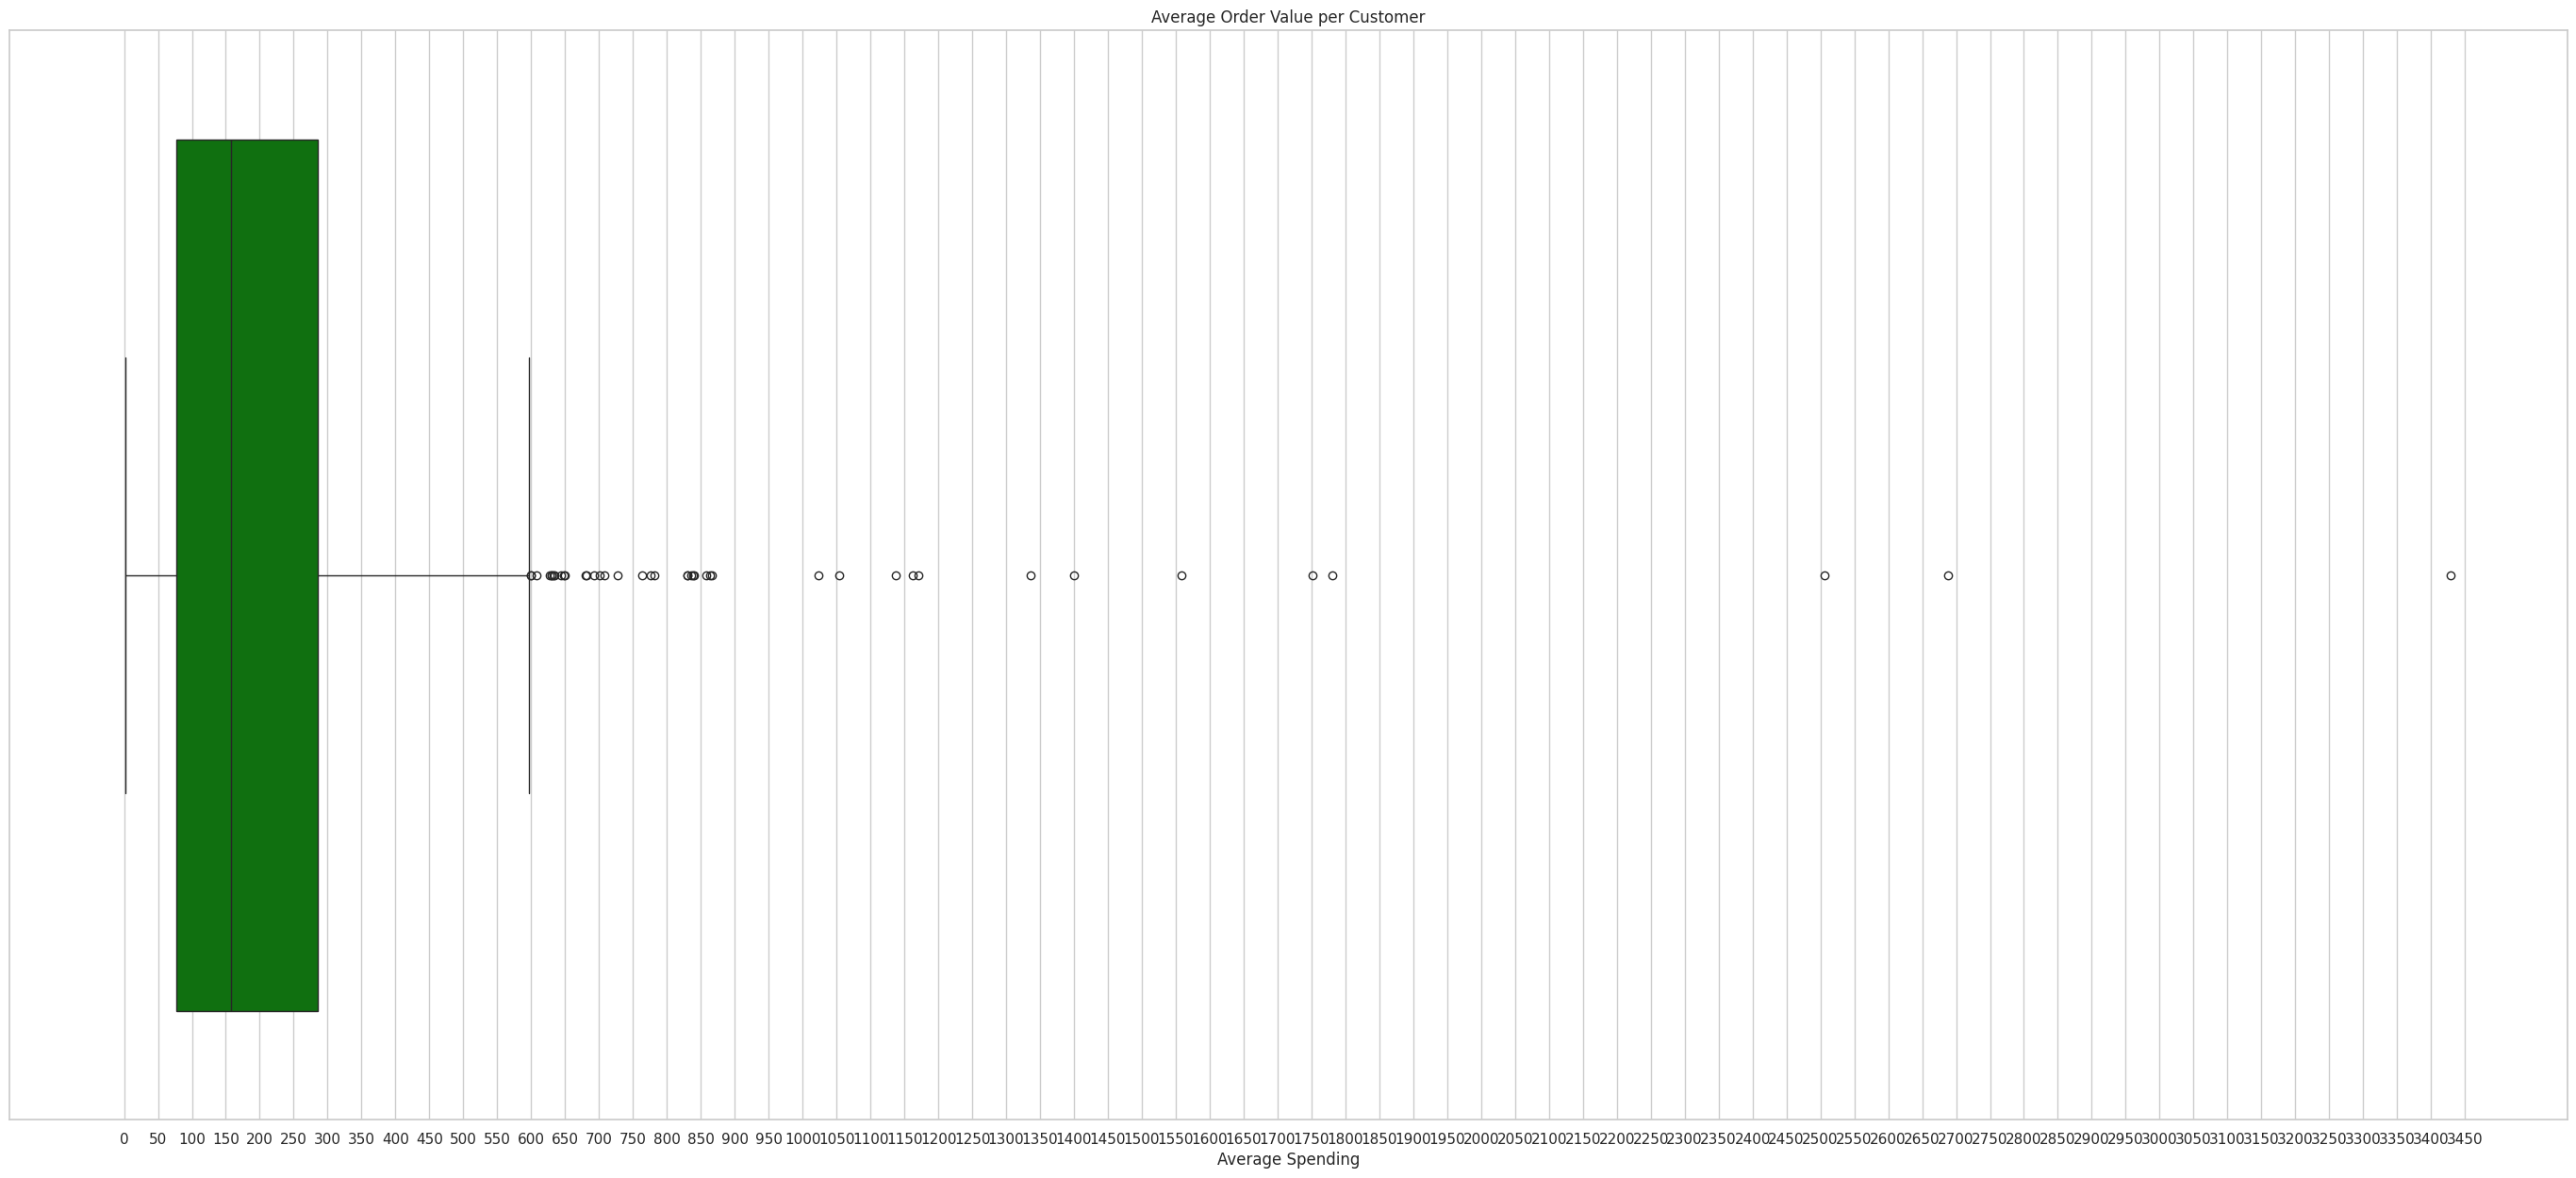

In [ ]:
avg_spending = df.groupby("Customer ID")["Sales"].mean().reset_index()
avg_spending.columns = ["Customer ID", "Average Order Value"]

plt.figure(figsize=(35, 15))
sns.boxplot(x=avg_spending["Average Order Value"], color="green")
plt.title("Average Order Value per Customer")
plt.xlabel("Average Spending")
plt.xticks(range(0, int(avg_spending["Average Order Value"].max()) + 50, 50))
plt.show()

# How customer spending varies across different segments using a boxplot.

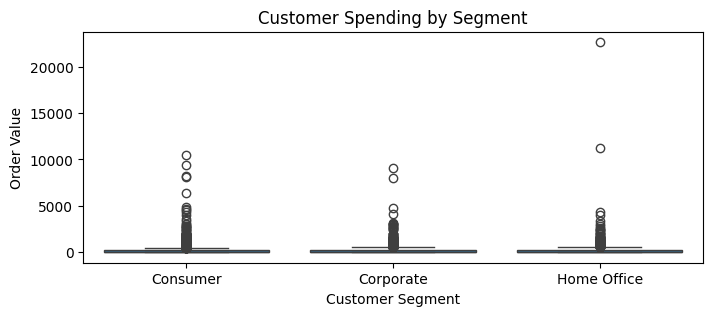

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x="Segment", y="Sales")
plt.title("Customer Spending by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Order Value")
plt.show()

# Identifies and visualizes the top 10 most ordered products using a bar chart.

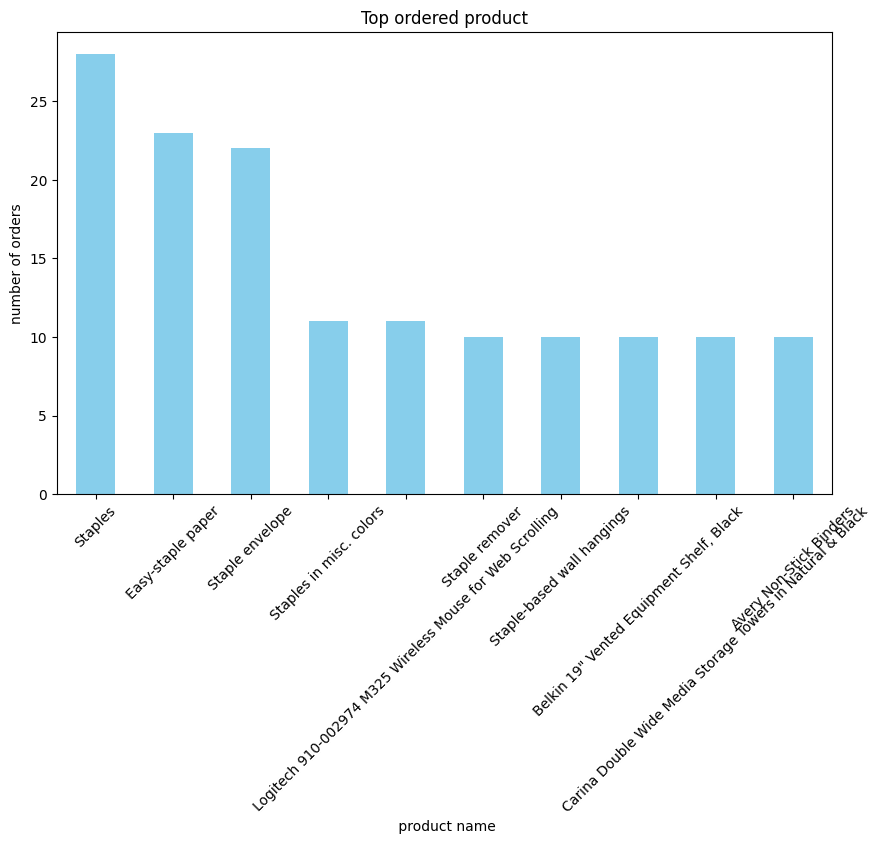

In [ ]:
top_products = df['Product Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.xlabel(" product name")
plt.ylabel("number of orders")
plt.title("Top ordered product")
plt.xticks(rotation=45)

plt.show()

# Identifies and visualizes the top 10 most ordered sub category using a bar chart. %%

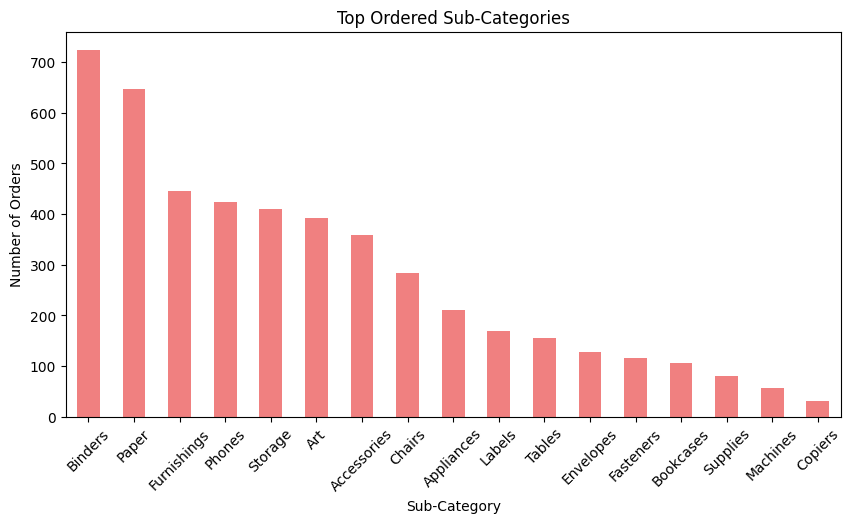

In [ ]:
top_subcategories = df['Sub-Category'].value_counts()

plt.figure(figsize=(10, 5))
top_subcategories.plot(kind='bar', color='lightcoral')
plt.xlabel("Sub-Category")
plt.ylabel("Number of Orders")
plt.title("Top Ordered Sub-Categories")
plt.xticks(rotation=45)
plt.show()

# Identifies and visualizes the top 10 most ordered category using a bar chart.

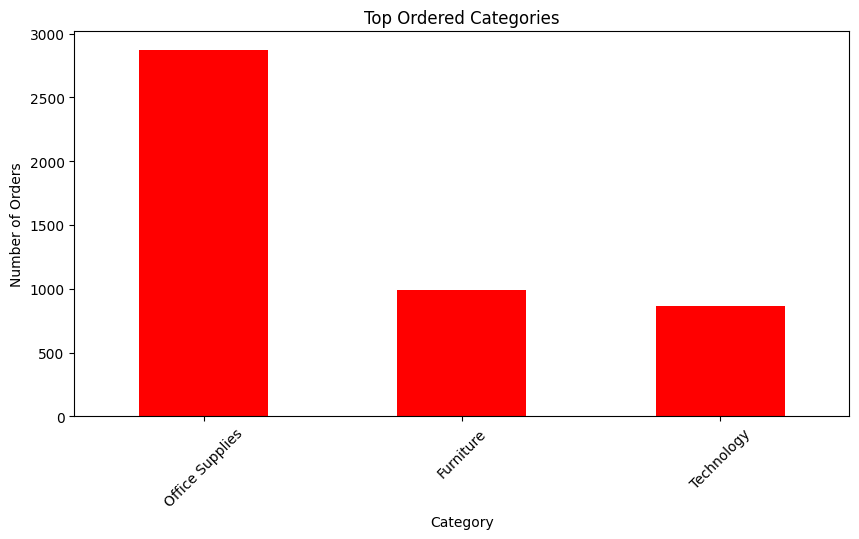

In [ ]:
top_subcategories = df['Category'].value_counts()

plt.figure(figsize=(10, 5))
top_subcategories.plot(kind='bar', color='red')
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.title("Top Ordered Categories")
plt.xticks(rotation=45)
plt.show()

# **Boxplot for Shipping Duration by Ship Mode**




<ipython-input-43-f12c1e928239>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ship Mode', y='Shipping Duration', data=df, palette='Set2')


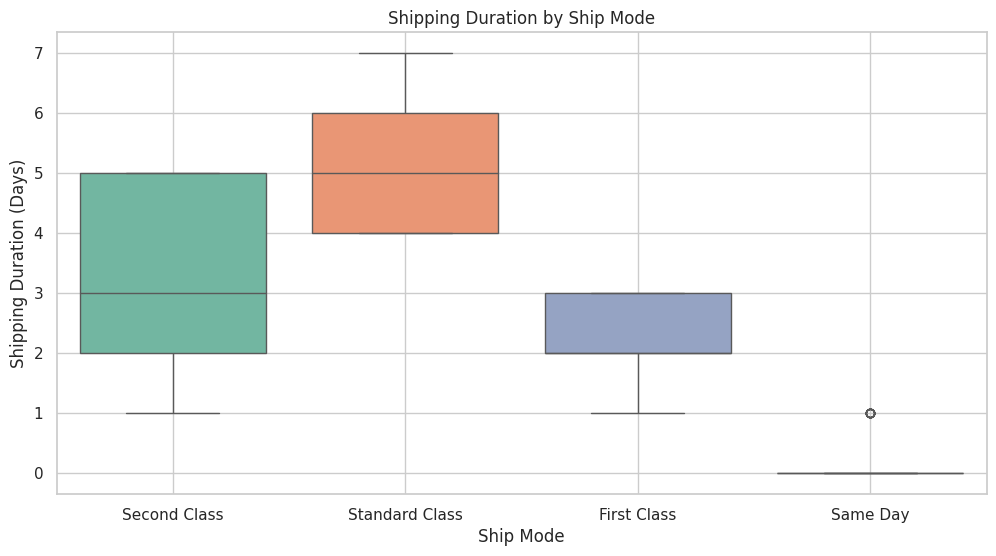

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ship Mode', y='Shipping Duration', data=df, palette='Set2')
plt.title('Shipping Duration by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Shipping Duration (Days)')
plt.grid(True)
plt.show()


# **Top 10 States with Most Delays**

<ipython-input-44-759a1cb5b934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_delay_states.index, y=top_delay_states.values, palette='muted')


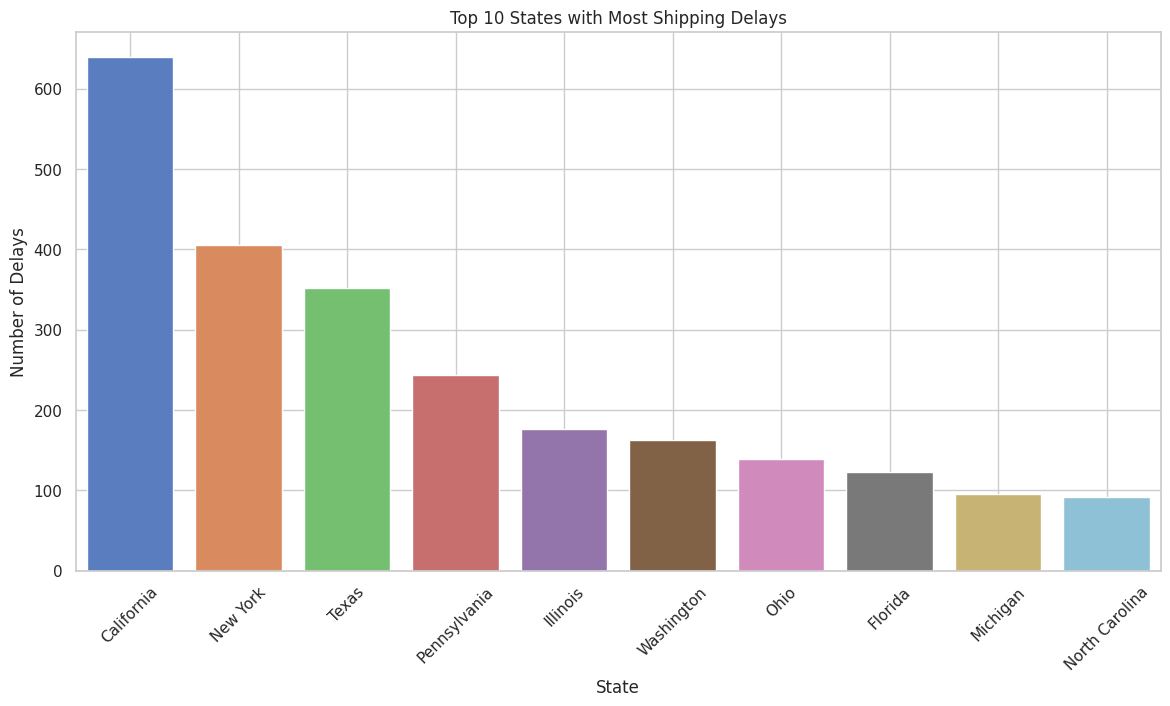

In [ ]:
top_delay_states = delay_by_location.groupby('State')['Delay Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_delay_states.index, y=top_delay_states.values, palette='muted')
plt.title('Top 10 States with Most Shipping Delays')
plt.xlabel('State')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Top 10 States by Sales

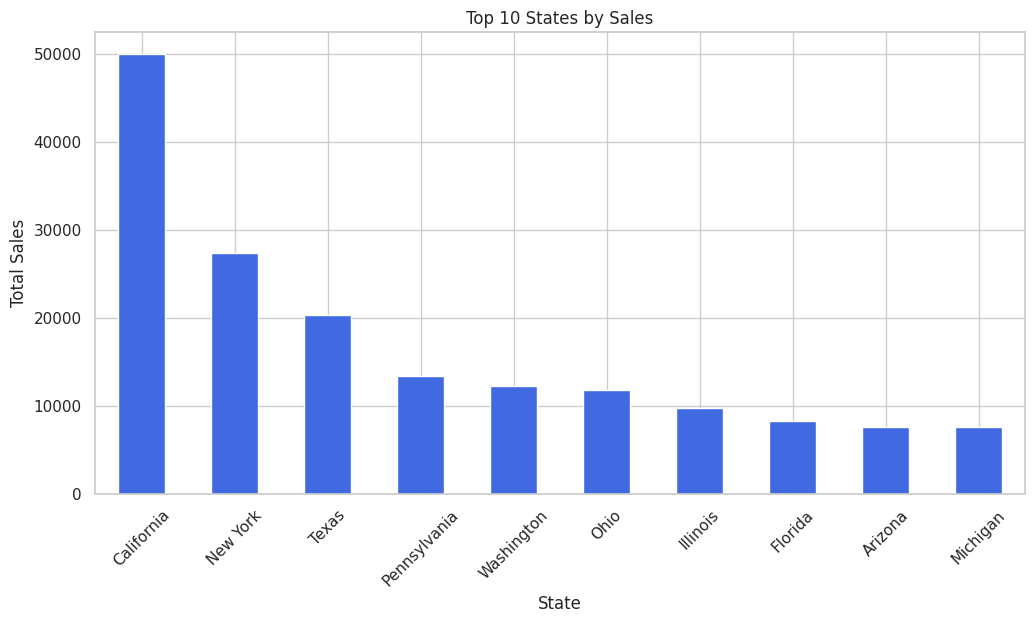

In [ ]:

plt.figure(figsize=(12, 6))
state_sales.head(10).plot(kind='bar', color='royalblue')
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Sales Performance by Region

<ipython-input-30-c96b6047d0e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_performance, palette='viridis')


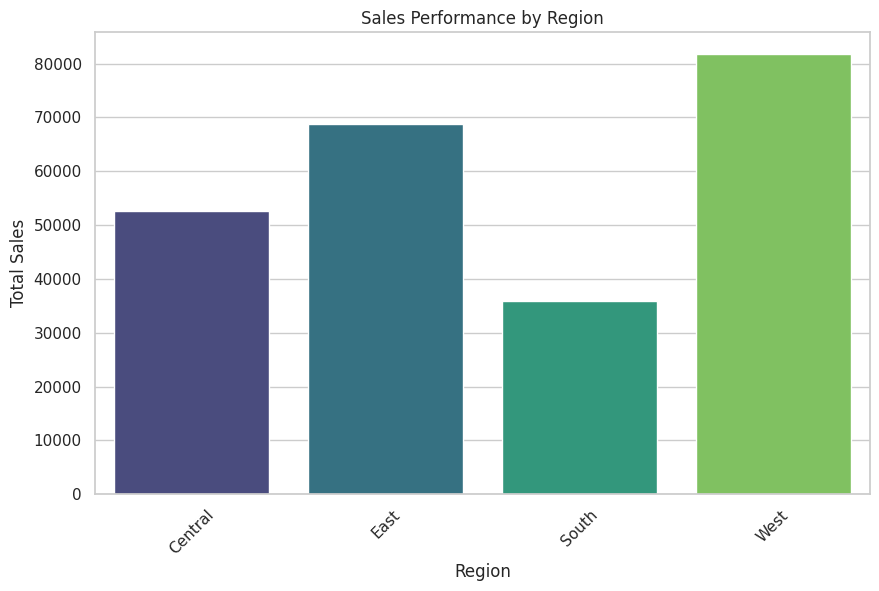

In [ ]:
region_performance = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_performance, palette='viridis')
plt.title('Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Sales by Region

<ipython-input-32-79c99aae74fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")


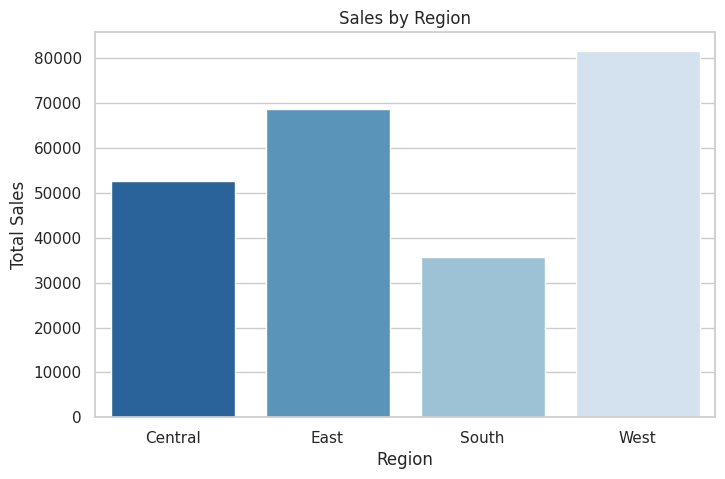

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# Sales vs Shipping Delays by Region


Average Shipping Delay by Region:
 Region
East       3.906956
South      3.918228
West       3.947767
Central    4.079241
Name: Shipping Duration, dtype: float64

Total Sales by Region:
 Region
South      35804.6515
Central    52587.2614
East       68733.0820
West       81723.7265
Name: Sales, dtype: float64


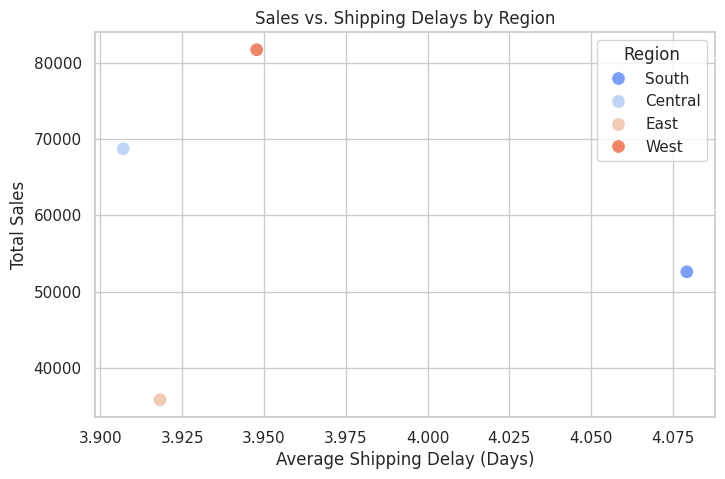

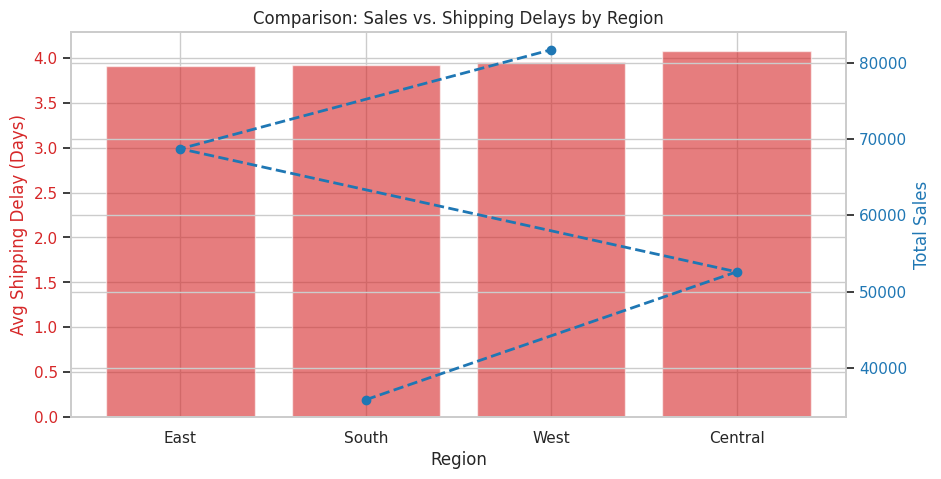

In [ ]:

# ✅  حساب مدة الشحن لكل طلب
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

#  حساب متوسط تأخير الشحن حسب المنطقة
region_shipping_delay = df.groupby('Region')['Shipping Duration'].mean().sort_values()
print("\nAverage Shipping Delay by Region:\n", region_shipping_delay)

#  حساب إجمالي المبيعات حسب المنطقة
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
print("\nTotal Sales by Region:\n", region_sales)

#  رسم العلاقة بين المبيعات وتأخير الشحن حسب المنطقة
plt.figure(figsize=(8, 5))
sns.scatterplot(x=region_shipping_delay, y=region_sales, hue=region_sales.index, palette="coolwarm", s=100)
plt.title("Sales vs. Shipping Delays by Region")
plt.xlabel("Average Shipping Delay (Days)")
plt.ylabel("Total Sales")
plt.show()

#  رسم بياني للمبيعات وتأخيرات الشحن في كل منطقة
fig, ax1 = plt.subplots(figsize=(10, 5))

# رسم تأخيرات الشحن
color = 'tab:red'
ax1.set_xlabel("Region")
ax1.set_ylabel("Avg Shipping Delay (Days)", color=color)
ax1.bar(region_shipping_delay.index, region_shipping_delay.values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# رسم المبيعات على نفس المحور
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel("Total Sales", color=color)
ax2.plot(region_sales.index, region_sales.values, color=color, marker="o", linestyle="dashed", linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison: Sales vs. Shipping Delays by Region")
plt.show()
